# Project: Investigating Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I chose is the Medical Appointments for 110k Brazilians. It shows when patients scheduled their appointments, whether or not patients are on welfare, the hospital locations, the gender and age of the patients, whether they missed their appointments as well as health conditions of the patients. I will be analyzing: 
> 1.) The average age of persons who missed their appointments
> 2.) The hospital locations with the highest averages of missed appointments

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
#load and view the first few rows of the data
appts = pd.read_csv('noshowappointments.csv')
appts.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed_appt
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#checking the amount of null values, if there are any
appts.isnull().sum()

Patient_ID         0
Appointment_ID     0
Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Neighbourhood      0
Scholarship        0
Hypertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
Missed_appt        0
dtype: int64

In [9]:
#checking if any values are duplicated
appts.duplicated().sum()

0

In [10]:
#getting a statistical idea of the data
appts.describe()

,Patient_ID,Appointment_ID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
#checking which columns are irrelevant to my analysis
appts.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed_appt
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I will be dropping Patient ID, Appointment ID, Scheduled Day, Appointment Day, Health conditions, Handcap and SMS received since they will not be necessary for my analysis.

In [12]:
appts.drop(['Patient_ID', 'Appointment_ID', 'Scheduled_Day', 'Appointment_Day', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], axis=1, inplace=True)

In [13]:
#check for change
appts.head()

,Gender,Age,Neighbourhood,Scholarship,Missed_appt
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


In [14]:
#changing Missed_appt data from Yes/No to 1/0
appts.Missed_appt = appts.Missed_appt.map(dict(Yes=1, No=0))

I changed the Missed_appt column to 1/0 so that I can calculate averages related to the amount of missed appointments.

In [15]:
#check for change in the first 10 rows
appts.head(10)

,Gender,Age,Neighbourhood,Scholarship,Missed_appt
0,F,62,JARDIM DA PENHA,0,0
1,M,56,JARDIM DA PENHA,0,0
2,F,62,MATA DA PRAIA,0,0
3,F,8,PONTAL DE CAMBURI,0,0
4,F,56,JARDIM DA PENHA,0,0
5,F,76,REPÚBLICA,0,0
6,F,23,GOIABEIRAS,0,1
7,F,39,GOIABEIRAS,0,1
8,F,21,ANDORINHAS,0,0
9,F,19,CONQUISTA,0,0


In [16]:
#look at stats for trimmed data
appts.describe()

,Age,Scholarship,Missed_appt
count,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.201933
std,23.110205,0.297675,0.401444
min,-1.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### What is the average age of people who missed their medical appointments?

In [24]:
#average people who missed their appointment
missed = appts.Missed_appt == 1
missed.mean()

0.20193255946510807

In [18]:
#average people who showed up to their appointment
showed = 1 - missed
showed.mean()

0.79806744053489198

In [19]:
#average age of people who missed their appointment
appts.Age[missed].mean()

34.317666562121957

On average, the age of people who missed their appointments is about 34 years old.

In [20]:
#average age of people who showed up for their appointment
appts.Age[showed].mean()

57.211595356790646

On average, patients aged 57 showed up for their appointments.

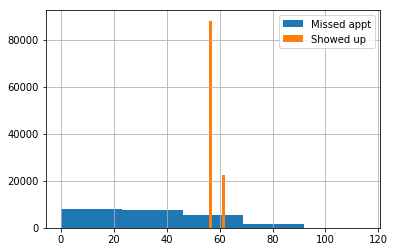

In [97]:
#plot the average ages
appts.Age[missed].hist(bins= 5, label='Missed appt')
appts.Age[showed].hist(bins= 5, label='Showed up');
plt.legend();

Younger people missed their appointments more than older people did. Based on the graph, it's difficult to say whether age and the rate of missed appointments are correlated.

### Which hospital had the highest rate of missed appointments?

In [77]:
#the average rate of missing appointments per hospital location
missedappts = appts.groupby([appts['Neighbourhood']], as_index=False)['Missed_appt'].mean()
missedappts

,Neighbourhood,Missed_appt
0,AEROPORTO,0.125000
1,ANDORINHAS,0.230327
2,ANTÔNIO HONÓRIO,0.184502
3,ARIOVALDO FAVALESSA,0.219858
4,BARRO VERMELHO,0.215130
5,BELA VISTA,0.201363
6,BENTO FERREIRA,0.224942
7,BOA VISTA,0.185897
8,BONFIM,0.198341
9,CARATOÍRA,0.230409


In [112]:
missedappts = appts.groupby([appts['Neighbourhood']], as_index=False)['Missed_appt'].mean()
missedappts

,Neighbourhood,Missed_appt
0,AEROPORTO,0.125000
1,ANDORINHAS,0.230327
2,ANTÔNIO HONÓRIO,0.184502
3,ARIOVALDO FAVALESSA,0.219858
4,BARRO VERMELHO,0.215130
5,BELA VISTA,0.201363
6,BENTO FERREIRA,0.224942
7,BOA VISTA,0.185897
8,BONFIM,0.198341
9,CARATOÍRA,0.230409


In [117]:
#checking the sum of missed appointments at ILHAS OCEÂNICAS DE TRINDADE due to it having an average of all of their appointments missed 
missedappts = appts.groupby([appts['Neighbourhood']], as_index=False)['Missed_appt'].sum()
missedappts.query('Neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,Neighbourhood,Missed_appt
34,ILHAS OCEÂNICAS DE TRINDADE,2


This shows that both appointments made at ILHAS OCEÂNICAS DE TRINDADE were missed however, I do not feel as though that information is fair to include in the analysis since the sample is too small. 

In [64]:
#finding the highest rates of missing appointments per hospital location
missedappts.quantile(0.90)

0.2304093567251462

In [78]:
most_missed = missedappts.query('Missed_appt > 0.230409')
most_missed

,Neighbourhood,Missed_appt
9,CARATOÍRA,0.230409
28,HORTO,0.240000
33,ILHA DO PRÍNCIPE,0.234775
34,ILHAS OCEÂNICAS DE TRINDADE,1.000000
36,ITARARÉ,0.262664
40,JESUS DE NAZARETH,0.243954
61,SANTA CECÍLIA,0.274554
62,SANTA CLARA,0.264822
70,SANTOS DUMONT,0.289185


The above cell shows the hosiptal locations with the highest rates of missed appointments. After observing the output, 'ILHAS OCEÂNICAS DE TRINDADE' seems to be an outlier so I will drop it from the data.

In [92]:
#dropping index 33 from the data
fixed_most_missed = most_missed.drop(34)
fixed_most_missed

,Neighbourhood,Missed_appt
9,CARATOÍRA,0.230409
28,HORTO,0.240000
33,ILHA DO PRÍNCIPE,0.234775
36,ITARARÉ,0.262664
40,JESUS DE NAZARETH,0.243954
61,SANTA CECÍLIA,0.274554
62,SANTA CLARA,0.264822
70,SANTOS DUMONT,0.289185


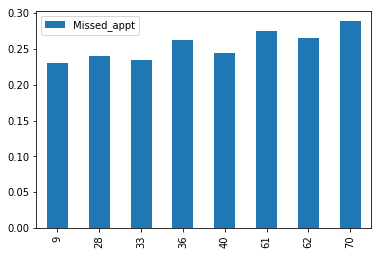

In [95]:
#plot most_missed
fixed_most_missed.plot(kind='bar');

Based on the plot, Santos Dumont (70) had the highest rate of missed appointments

<a id='conclusions'></a>
## Conclusions

> Based off of my calculations, about 20% of patients missed their appointments. Of the 20%, the average age of those who missed their appointments was 34. While the average age of people who shoed up for their appointments was 57.

> The hospital location with the highest rate of missed appointments was Santos Dumont, with about 29% of their appointments being missed. This could be due to numerous reasons, but after doing some research on the town itself, Santos Dumont was found to be in a rural area, which could be the reason for many patients not showing up to their medical appointments.

> There was an outlier of 'ILHAS OCEÂNICAS DE TRINDADE' which could be because all instances of an appointment being scheduled at that loction were missed.


In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0